# Picture 1

In [1]:
# Import needed packages
import pandas as pd

# Load the files. Specifile file path since the .data are in a subfolder.
df1 = pd.read_csv('MysteryData/Mystery1.data', header=None)
print("----\n\ndf1\n")
print(df1.head())

# Repeat for the other files
df2 = pd.read_csv('MysteryData/Mystery2.data', header=None)
print("----\n\ndf2\n")
print(df2.head())
df3 = pd.read_csv('MysteryData/Mystery3.data', header=None)
print("----\n\ndf3\n")
print(df3.head())
df4 = pd.read_csv('MysteryData/Mystery4.data', header=None)
print("----\n\ndf4\n")
print(df4.head())
df5 = pd.read_csv('MysteryData/Mystery5.data', header=None)
print("----\n\ndf5\n")
print(df5.head())

----

df1

   0    1    2    3    4    5    6    7    8    9    ...  490  491  492  493  \
0    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
1    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
2    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
3    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
4    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   

   494  495  496  497  498  499  
0    1    1    1    1    1    1  
1    1    1    1    1    1    1  
2    1    1    1    1    1    1  
3    1    1    1    1    1    1  
4    1    1    1    1    1    1  

[5 rows x 500 columns]
----

df2

   0    1    2    3    4    5    6    7    8    9    ...  592  593  594  595  \
0  250  250    3    3    3    3    3    3    3    3  ...    3    3    3    3   
1  250  250    3    3    3    3    3    3    3    3  ...    3    3    3    3   
2  250  250    3    3    3   

After further exploration, the five files share similar properties, but should not be combines
# The great reveal about the mystery data
The professor revealed that the five files are one picture each.
In each picture, a value represents a pixel and a RGB color code.
Our goal is to transform the .data files into picturees, and fine-tune the color.

## Attemp 1: ask Chat GPT and try the method provided

### Key Points
* Normalization:
    * This ensures that the pixel values are in the correct range for a grayscale image (0–255).
* Grayscale Image Mode: 
    * The 'L' mode tells Pillow that you're creating a grayscale image.

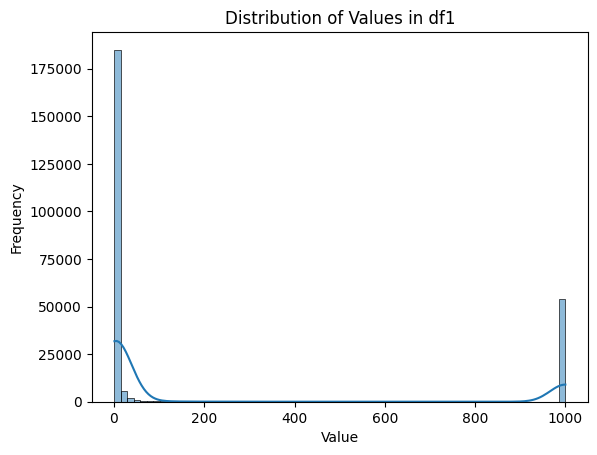

In [2]:
# pic 1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten the DataFrame to 1D if it's multi-dimensional (to avoid complications)
df1_flat = df1.values.flatten()

# Plot histogram using seaborn
sns.histplot(df1_flat, bins=70, kde=True)  # kde=True adds a smooth curve
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values in df1')
plt.show()


#### Handling the Bimodal Distribution
For U-shaped or bimodal distributions, normalization might not fully address the concentration of values around two distinct regions (0-100 and 900-1000). In such cases, you might want to:

* Use log transformation to compress large values and expand small ones, making the distribution more uniform. This works well when there is a large gap in value ranges

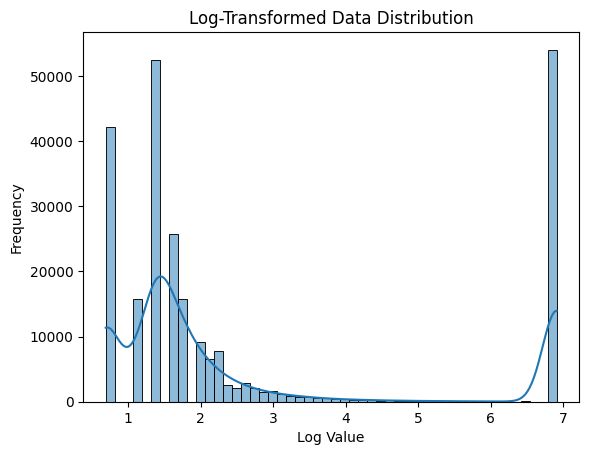

In [3]:
import numpy as np

# Apply log transformation (add small constant to avoid log(0))
log_transformed_data = np.log1p(df1_flat)  # log1p(x) = log(1 + x) to handle zeros

# Plot histogram of log-transformed data
sns.histplot(log_transformed_data.flatten(), bins=50, kde=True)
plt.title('Log-Transformed Data Distribution')
plt.xlabel('Log Value')
plt.ylabel('Frequency')
plt.show()


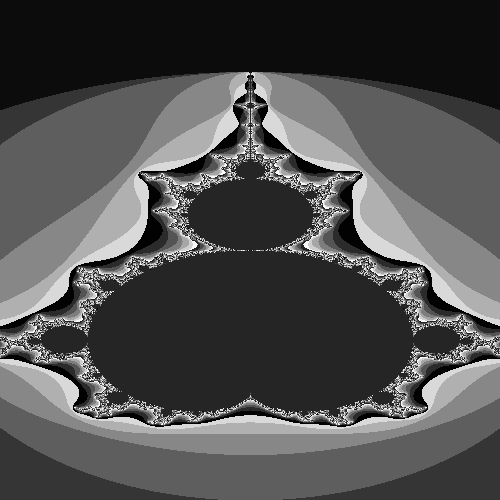

In [4]:
import numpy as np
from PIL import Image

# Step 1: Load the .data file with comma as the delimiter
data = np.loadtxt('MysteryData/Mystery1.data', delimiter=',')  # Specify the delimiter

# Step 2: Normalize data to ensure values fall within the 0-255 range for grayscale
min_val = log_transformed_data.min()
max_val = log_transformed_data.max()

# Normalize data to 0-255
normalized_data = (data - min_val) / (max_val - min_val) * 255


# Step 3: Convert to an image
image = Image.fromarray(np.uint8(normalized_data), 'L')  # 'L' mode for grayscale image

# Step 4: Save as PNG or JPG
image.save('output_image1_log.png')
display(image)

#### Result - quite detailded gray scale image. Just need some coloring.

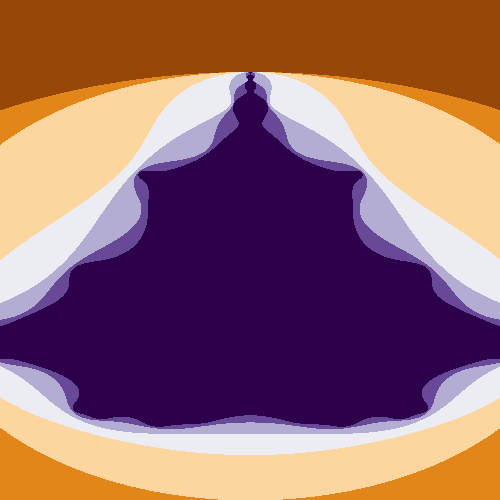

In [5]:
# pic 1 - add color
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Load your normalized data (already normalized from 0 to 255)

# Step 2: Apply a colormap using matplotlib
colormap = plt.get_cmap('PuOr')  # You can try other colormaps like 'plasma', 'inferno', 'jet', etc.
colored_data = colormap(normalized_data / 255.0)  # Normalizing to [0, 1] for colormap

# Step 3: Convert to an RGB image (ignore the alpha channel returned by the colormap)
rgb_data = (colored_data[:, :, :3] * 255).astype(np.uint8)  # Remove alpha channel and convert to 0-255 range

# Step 4: Convert to a PIL image and save
image = Image.fromarray(rgb_data)
image.save('output1_color1.png')
display(image)

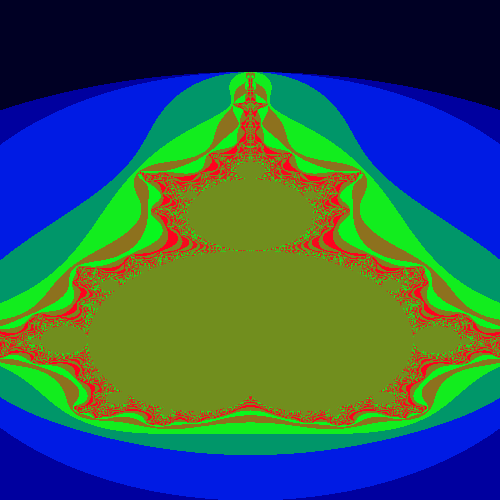

In [6]:
# pic1 -add color -custom color map
# Step 1: Load your normalized data (already normalized from 0 to 255)


# Step 2: Custom function to map grayscale values to RGB
def grayscale_to_rgb(value):
    if value < 85:  # Blue gradient for low values
        red = 0
        green = 0
        blue = int(255 * (value / 85))  # Map [0-85] to [0-255]
    elif value < 170:  # Green gradient for middle values
        red = 0
        green = int(255 * ((value - 85) / 85))  # Map [85-170] to [0-255]
        blue = int(255 * (1 - ((value - 85) / 85)))  # Gradually reduce blue
    else:  # Red gradient for high values
        red = int(255 * ((value - 170) / 85))  # Map [170-255] to [0-255]
        green = int(255 * (1 - ((value - 170) / 85)))  # Gradually reduce green
        blue = 30
    return (red, green, blue)

# Step 3: Apply the mapping to the entire dataset
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data])

# Step 4: Convert to an image and save
image = Image.fromarray(np.uint8(rgb_data))
image.save('output1_custom1.png')
display(image)

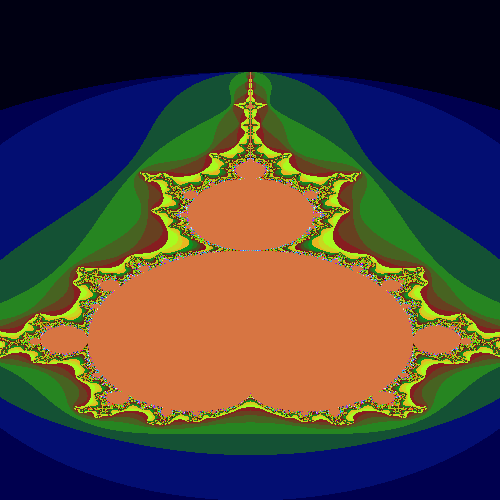

In [7]:
# pic1 - specify the color i want 

# Step 1: Define your custom color mapping function
def grayscale_to_rgb(value):
    if value < 85:  # Low values map to dark blue (0, 0, 128)
        # Interpolating between black (0,0,0) and dark blue (0, 0, 128)
        red = 0
        green = 0
        blue = int(128 * (value / 85))  # Gradually increase blue from 0 to 128
    elif value < 170:  # Mid-range values map to green (34, 139, 34)
        # Interpolating between dark blue (0, 0, 128) and green (34, 139, 34)
        red = int(34 * ((value - 85) / 85))  # Increase red from 0 to 34
        green = int(139 * ((value - 85) / 85))  # Increase green from 0 to 139
        blue = int(128 * (1 - ((value - 85) / 85)))  # Decrease blue from 128 to 34
    else:  # High values map to dark chocolate brown (101, 67, 33)
        # Interpolating between green (34, 139, 34) and brown (101, 67, 33)
        red = int(34 + (101 - 34) * ((value - 170) / 85))  # Increase red from 34 to 101
        green = int(139 + (67 - 139) * ((value - 170) / 85))  # Decrease green from 139 to 67
        blue = int(34 - (34 - 33) * ((value - 170) / 85))  # Slightly reduce blue from 34 to 33
    return (red, green, blue)

# Step 2: Apply the mapping to the entire dataset
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data])

# Step 3: Convert to an image and save
image = Image.fromarray(np.uint8(rgb_data))
image.save('output1_custom2.png')
display(image)

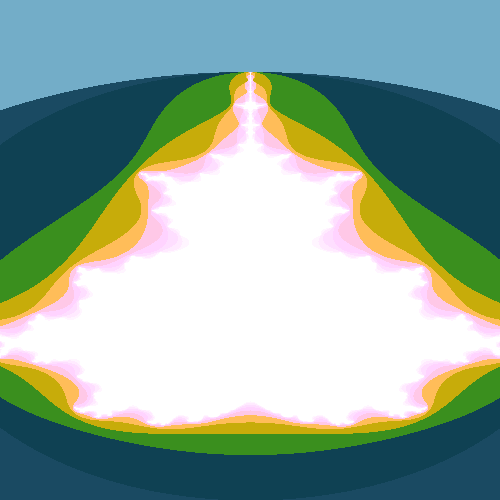

In [8]:
import numpy as np
from PIL import Image
from IPython.display import display

# Define custom color mapping with shades
color_mapping = {
    'section1_start': (142, 202, 230),    # light blue
    'section1_end': (2, 48, 71),          # Dark blue
    
    'section2_start': (0, 0, 128),        # Dark blue
    'section2_end': (34, 139, 34),        # Green
    
    'section3_start': (34, 139, 34),      # Green
    'section3_end': (255, 183, 3),        # yellow
    
    'section4_start': (255, 183, 3),      # yellow
    'section4_end': (255, 200, 221),          # pink
}

# Define the function to map grayscale values to these colors
def grayscale_to_rgb(value):
    if value < 64:  # Section 1
        factor = value / 64
        color1 = color_mapping['section1_start']
        color2 = color_mapping['section1_end']
    elif value < 128:  # Section 2
        factor = (value - 64) / 64
        color1 = color_mapping['section2_start']
        color2 = color_mapping['section2_end']
    elif value < 192:  # Section 3
        factor = (value - 128) / 64
        color1 = color_mapping['section3_start']
        color2 = color_mapping['section3_end']
    else:  # Section 4
        factor = (value - 192) / 63
        color1 = color_mapping['section4_start']
        color2 = color_mapping['section4_end']  
        
    red = int(color1[0] * (1 - factor) + color2[0] * factor)
    green = int(color1[1] * (1 - factor) + color2[1] * factor)
    blue = int(color1[2] * (1 - factor) + color2[2] * factor)

    # Clamp values to the range 0-255
    red = max(0, min(255, red))
    green = max(0, min(255, green))
    blue = max(0, min(255, blue))
    
    
    return (red, green, blue)



# Apply color mapping
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data], dtype=np.uint8)

# Convert to an image
image = Image.fromarray(rgb_data)

# Save the image
image_path = 'output1_custom3.png'
image.save(image_path)

# Display the image
display(image)


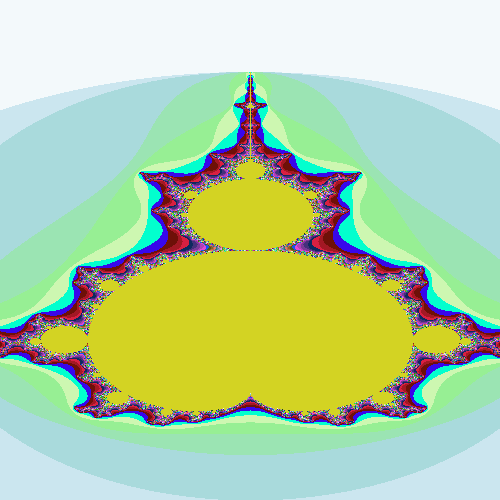

In [9]:
# asked chatGPT for pastel color scheme
# Step 1: Define your custom pastel color mapping function
def grayscale_to_rgb(value):
    if value < 85:  # Low values map to a light pastel blue (173, 216, 230)
        # Interpolating between white (255,255,255) and light blue (173, 216, 230)
        red = int(255 - (82 * (value / 85)))  # Decrease red from 255 to 173
        green = int(255 - (39 * (value / 85)))  # Decrease green from 255 to 216
        blue = int(255 - (25 * (value / 85)))  # Decrease blue from 255 to 230
    elif value < 170:  # Mid-range values map to light pastel green (144, 238, 144)
        # Interpolating between light blue (173, 216, 230) and pastel green (144, 238, 144)
        red = int(173 - (29 * ((value - 85) / 85)))  # Decrease red from 173 to 144
        green = int(216 + (22 * ((value - 85) / 85)))  # Increase green from 216 to 238
        blue = int(230 - (86 * ((value - 85) / 85)))  # Decrease blue from 230 to 144
    else:  # High values map to pastel yellow (255, 255, 204)
        # Interpolating between pastel green (144, 238, 144) and pastel yellow (255, 255, 204)
        red = int(144 + (111 * ((value - 170) / 85)))  # Increase red from 144 to 255
        green = int(238 + (17 * ((value - 170) / 85)))  # Increase green from 238 to 255
        blue = int(144 + (60 * ((value - 170) / 85)))  # Increase blue from 144 to 204
    return (red, green, blue)

# Step 2: Apply the mapping to the entire dataset
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data])

# Step 3: Convert to an image and save
image = Image.fromarray(np.uint8(rgb_data))
image.save('output1_custom4.png')
display(image)


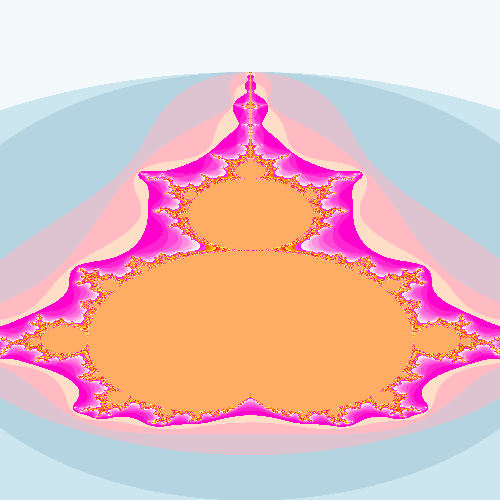

In [10]:
# Aiming to get rid of the yellowisg=h green in the middle
# Step 1: Define your custom pastel color mapping function with a lighter, pleasant mid-tone
def grayscale_to_rgb(value):
    if value < 85:  # Low values map to a light pastel blue (173, 216, 230)
        # Interpolating between white (255,255,255) and light blue (173, 216, 230)
        red = int(255 - (82 * (value / 85)))  # Decrease red from 255 to 173
        green = int(255 - (39 * (value / 85)))  # Decrease green from 255 to 216
        blue = int(255 - (25 * (value / 85)))  # Decrease blue from 255 to 230
    elif value < 170:  # Mid-range values map to a light pastel coral (255, 182, 193)
        # Interpolating between light blue (173, 216, 230) and coral (255, 182, 193)
        red = int(173 + (82 * ((value - 85) / 85)))  # Increase red from 173 to 255
        green = int(216 - (34 * ((value - 85) / 85)))  # Decrease green from 216 to 182
        blue = int(230 - (37 * ((value - 85) / 85)))  # Decrease blue from 230 to 193
    else:  # High values map to pastel yellow (255, 255, 204)
        # Interpolating between coral (255, 182, 193) and pastel yellow (255, 255, 204)
        red = int(255)  # Stay at 255 for red
        green = int(182 + (73 * ((value - 170) / 85)))  # Increase green from 182 to 255
        blue = int(193 + (11 * ((value - 170) / 85)))  # Slightly increase blue from 193 to 204
    return (red, green, blue)

# Step 2: Apply the mapping to the entire dataset
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data])

# Step 3: Convert to an image and save
image = Image.fromarray(np.uint8(rgb_data))
image.save('output1_custom5.png')
display(image)
